<a href="https://colab.research.google.com/github/dobosipeter/visual-transformer-vs-cnn/blob/main/CNNvsTransformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning Homework  
Comparing CNNs with Transformers on an image classification task.  
Created by OnePersonTeam(Peter Dobosi, MW79ON)

Steps required to complete the first milestone:  
* Decide on an open source database to use.
* Load the database and split it into train, validation and test subsets.

My plan is to use the [Fruit 360](https://github.com/Horea94/Fruit-Images-Dataset) dataset to further train a pretrained CNN and Transformer model.  
After that, compare the two models based on the following criteria, as defined in the task:
* model architecture
* model operation
* computational capacity
* runtime
* testing accuracy

First things first, let's mount my Google Drive so that we don't have to redownload the data and retrain the models each time we start a new session.

In [27]:
# The necessary imports
from google.colab import drive
import os
!pip install gitpython
import git
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [2]:
# Define a function to mount Google Drive and change into the required folder
def mount_gdrive():
  """
  Mount Google drive and change into the required folder
  """
  # Call the drive library to mount the drive folder
  drive.mount('/content/gdrive')
  # Change into the required directory
  os.chdir('gdrive/MyDrive/deeplearning/datasets')
  os.getcwd()

In [3]:
# Call the function to actually mount it
mount_gdrive()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Define a function to clone the data from GitHub
def download_data(url: str):
  """
  Clone data from a GitHub url.

  :param url: The url to clone the data from
  """
  # Call the installed library to clone the repo for us, into the current directory
  git.Repo.clone_from(url, os.getcwd())

In [5]:
# Clone the data, but only if it hasn't been cloned yet
if(not os.path.isdir("/content/gdrive/MyDrive/deeplearning/datasets/Test")):
  # Actually call the method, to clone the data for us, with the datasets url.
  download_data("https://github.com/Horea94/Fruit-Images-Dataset")

Now the datasets folder contains the following two relevant subfolders:  
* Test
* Training

We need a validation set as well. But we don't need to create a seperate folder for it, as I'm planning to use K-fold cross validation on the training data.  
Currently the dataset is split into the two subfolders, in a 25-75% ratio. Both of the subfolders contain a folder for each one of the 131 classes in the dataset, and these class folders contain the actual 100x100 images, in .jpg format.  
In the future I might have to transform the data in one way or another. However this will depend on the models that I will use, and thus I can't do it yet.

Let's take a quick look at some of the images.

In [6]:
# Set up matplotlib
%matplotlib inline

In [42]:
# Define a function to plot the images
def plot_image(path: str):
  """
  Plot an image using matplotlib, given its path.

  :param path: The path of the image to plot.
  """
  # Read the image from the given path
  image = mpimg.imread(path)
  # Create a new figure for the image
  plt.figure()
  # Get the class of the image from the path
  image_class = path.split("/")[-2]
  # Set the title of the image to its class
  plt.title(image_class)
  # Plot the image and capture the plot object
  imgplot = plt.imshow(image)


In [29]:
# Define a function to select a given number of random files from a given folder
def select_random_images(number: int, folder: str) -> [str]:
  """
  Return a list of given length of valid paths, given a parent folder.

  :param number: The number of images to return.
  :param folder: The path of the parent folder to get the files from.

  :return: A list of number length, of strings, where each string is a valid path.
  """
  # Get the list of directories on the given path
  list_of_directories = os.listdir(folder)
  # Select the required amount of folders
  selected_directories = random.sample(list_of_directories, number)
  # The selected paths
  selected_paths = []
  # Select a random file from each directory
  # Go through the selected directories
  for directory in selected_directories:
    # Create the path of this directory
    path_of_this_directory = os.path.join(folder, directory)
    # Select a random file from the directory
    filename = random.choice(os.listdir(path_of_this_directory))
    # Create the full path of the filename
    file_path = os.path.join(path_of_this_directory, filename)
    # Add the file path to the list of filepaths
    selected_paths.append(file_path)
  # Once we are done selecting the required amount of paths, return them
  return selected_paths

In [35]:
# Call the above defined method to select five images for us
selected_files = select_random_images(5, "/content/gdrive/MyDrive/deeplearning/datasets/Test")

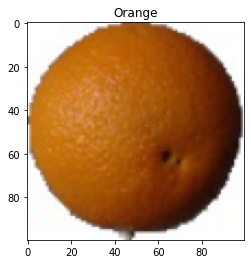

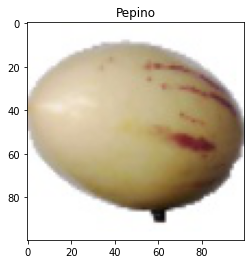

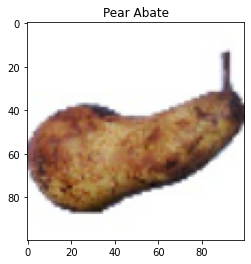

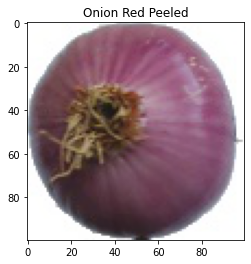

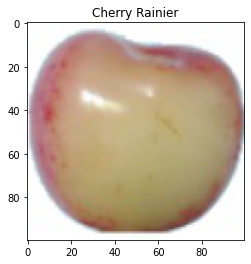

In [43]:
# Plot the randomly selected images
for path in selected_files:
  plot_image(path)

The next step will be to select the two models that I will compare.